In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns

In [7]:
 df = pd.read_csv('customer_churn_dataset.csv')

In [9]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [13]:
df.columns

Index(['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'contract',
       'payment_method', 'internet_service', 'tech_support', 'online_security',
       'support_calls', 'churn'],
      dtype='object')

In [25]:
print(df.dtypes)

print(len(df.columns))

customer_id           int64
tenure                int64
monthly_charges     float64
total_charges       float64
contract             object
payment_method       object
internet_service     object
tech_support         object
online_security      object
support_calls         int64
churn                object
dtype: object
11


In [27]:
cat_df = df.select_dtypes(include="object")
cat_df

,contract,payment_method,internet_service,tech_support,online_security,churn
0,Month-to-month,Credit,DSL,No,Yes,No
1,Month-to-month,Debit,DSL,No,No,No
2,Month-to-month,Debit,DSL,No,No,No
3,One year,Cash,Fiber,Yes,Yes,No
4,Month-to-month,UPI,Fiber,No,No,Yes
...,...,...,...,...,...,...
19995,Two year,Cash,DSL,No,Yes,Yes
19996,Month-to-month,UPI,Fiber,Yes,No,No
19997,Month-to-month,Credit,Fiber,No,No,No
19998,Month-to-month,Debit,DSL,Yes,No,No


In [29]:
for each_col in cat_df.columns:
    print(each_col) 
    print("Count =",len(df[each_col].unique()))
    if len(df[each_col].unique())<=10:
          print(df[each_col].unique())
    print("=================")

contract
Count = 3
['Month-to-month' 'One year' 'Two year']
payment_method
Count = 4
['Credit' 'Debit' 'Cash' 'UPI']
internet_service
Count = 3
['DSL' 'Fiber' nan]
tech_support
Count = 2
['No' 'Yes']
online_security
Count = 2
['Yes' 'No']
churn
Count = 2
['No' 'Yes']


In [31]:
df['contract']= df['contract'].astype('category')
df['payment_method']= df['payment_method'].astype('category')
df['internet_service']= df['internet_service'].astype('category')
df['tech_support']= df['tech_support'].astype('category')
df['online_security']= df['online_security'].astype('category')
df['churn']= df['churn'].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       20000 non-null  int64   
 1   tenure            20000 non-null  int64   
 2   monthly_charges   20000 non-null  float64 
 3   total_charges     20000 non-null  float64 
 4   contract          20000 non-null  category
 5   payment_method    20000 non-null  category
 6   internet_service  17987 non-null  category
 7   tech_support      20000 non-null  category
 8   online_security   20000 non-null  category
 9   support_calls     20000 non-null  int64   
 10  churn             20000 non-null  category
dtypes: category(6), float64(2), int64(3)
memory usage: 899.4 KB


In [37]:
df.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,10000.500000,36.467450,70.010531,2543.979209,1.51255
std,5773.647028,20.773984,28.890239,1882.949804,1.23524
min,1.000000,1.000000,20.000000,20.230000,0.00000
25%,5000.750000,18.000000,45.210000,1045.837500,1.00000
50%,10000.500000,36.000000,70.090000,2096.495000,1.00000
75%,15000.250000,54.000000,95.072500,3690.337500,2.00000
max,20000.000000,72.000000,120.000000,8629.920000,8.00000


In [39]:
print(df.isnull().sum())

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64


In [63]:
df['internet_service'].fillna(df['internet_service'].mode()[0],inplace=True)
                             

In [65]:
print(df.isnull().sum())

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64


In [69]:
df.duplicated().sum()

0

In [75]:
num_df= df.select_dtypes(include='number')
num_df

,customer_id,tenure,monthly_charges,total_charges,support_calls
0,1,52,54.20,2818.40,1
1,2,15,35.28,529.20,2
2,3,72,78.24,5633.28,0
3,4,61,80.24,4894.64,0
4,5,21,39.38,826.98,4
...,...,...,...,...,...
19995,19996,36,69.51,2502.36,0
19996,19997,10,59.88,598.80,1
19997,19998,6,42.96,257.76,2
19998,19999,7,102.85,719.95,2


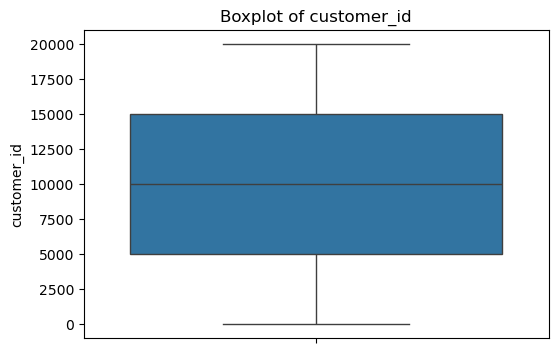

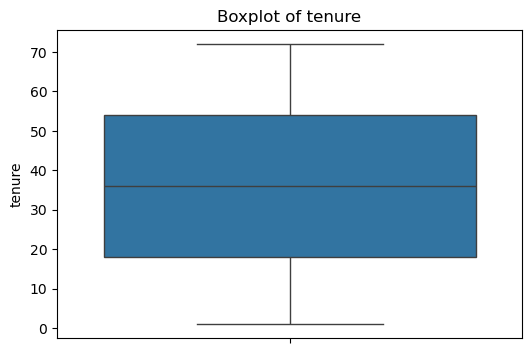

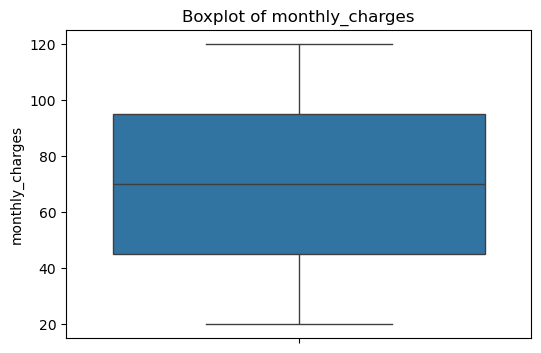

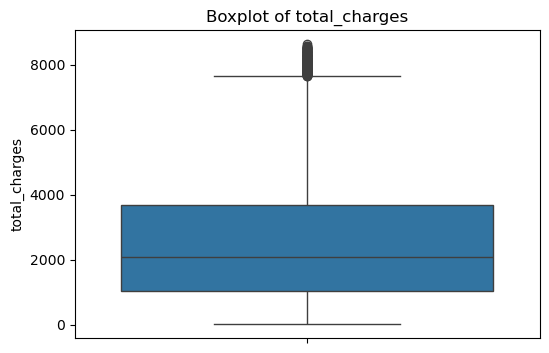

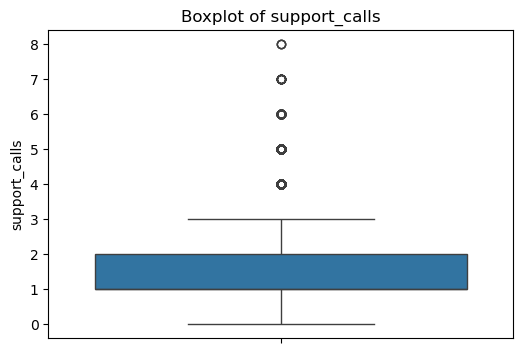

In [77]:
for col in num_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [81]:
np.quantile(df['support_calls'],0.25)

1.0

In [83]:
q1 = np.quantile(df['support_calls'], 0.25)
q3 = np.quantile(df['support_calls'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR

### Use IQR to find lower and upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)

### Use these limits to remove instances (rows)
index_list = df.index[ (df['support_calls'] < lower_limit) | (df['support_calls'] > upper_limit) ]
print(index_list, len(index_list))
df = df.drop(index_list)
print(df.shape)

1.0 2.0
-0.5 3.5
Index([    4,    32,    37,    59,    68,    74,    82,    86,   125,   134,
       ...
       19853, 19886, 19911, 19917, 19928, 19944, 19949, 19968, 19970, 19978],
      dtype='int64', length=1325) 1325
(18675, 11)


In [85]:
df.reset_index(drop=True, inplace=True)
df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,6,24,39.66,951.84,Two year,Cash,Fiber,No,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...
18670,19996,36,69.51,2502.36,Two year,Cash,DSL,No,Yes,0,Yes
18671,19997,10,59.88,598.80,Month-to-month,UPI,Fiber,Yes,No,1,No
18672,19998,6,42.96,257.76,Month-to-month,Credit,Fiber,No,No,2,No
18673,19999,7,102.85,719.95,Month-to-month,Debit,DSL,Yes,No,2,No


0.22909424500950057


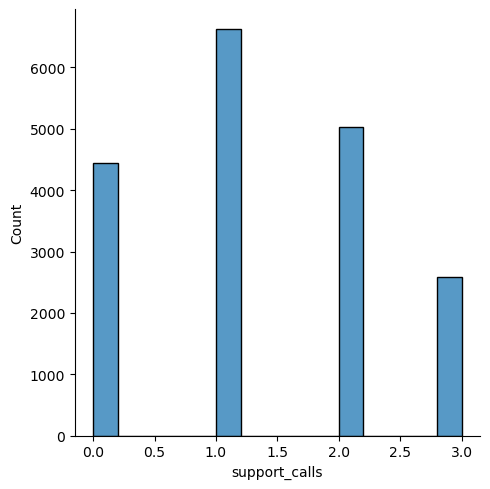

In [87]:
sns.displot(x='support_calls', data= df, bins=15 )

### Compute skewness
print(df['support_calls'].skew())


0.22909424500950057


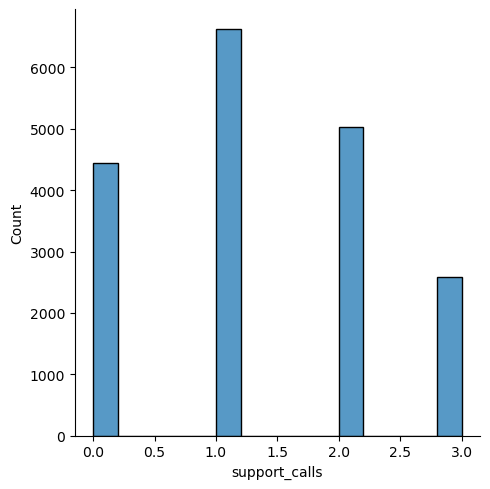

In [87]:
sns.displot(x='support_calls', data= df, bins=15 )

### Compute skewness
print(df['support_calls'].skew())


-0.0004180953924765113


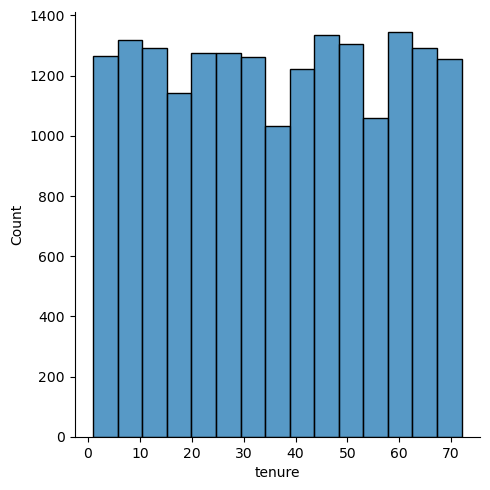

In [91]:
sns.displot(x='tenure', data= df, bins=15 )

### Compute skewness
print(df['tenure'].skew())


0.00223925413899135


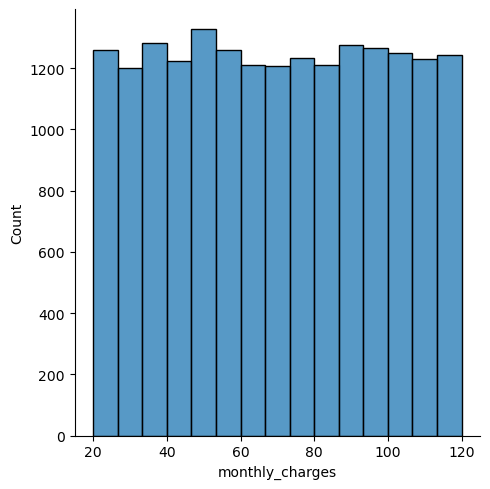

In [97]:
sns.displot(x='monthly_charges', data= df, bins=15 )

### Compute skewness
print(df['monthly_charges'].skew())


0.8295187555741373


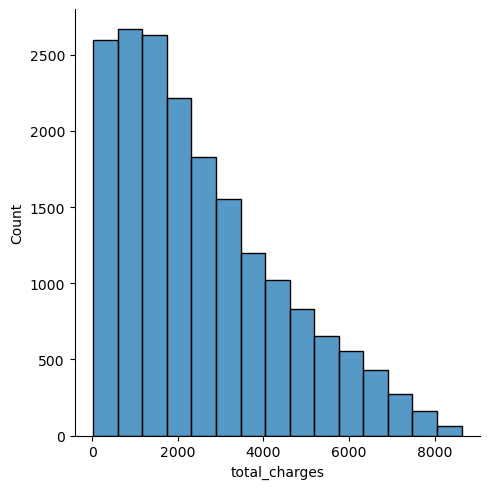

In [101]:
sns.displot(x='total_charges', data= df, bins=15 )

### Compute skewness
print(df['total_charges'].skew())


-0.39854895012377284


-0.39854895012377284

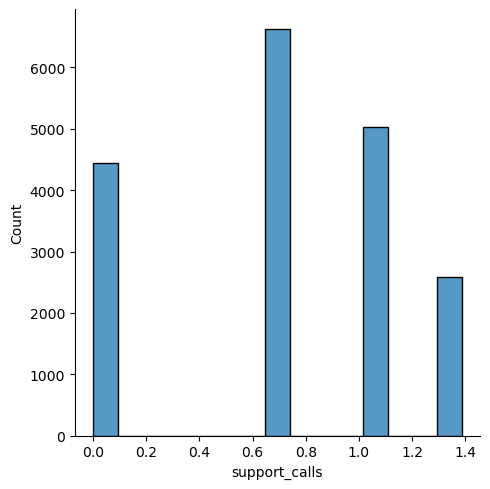

In [89]:
support_Driven_log = np.log(df['support_calls'] + 1)
print(support_Driven_log.skew())
sns.displot(x=support_Driven_log,bins=15)

### IMPORTANT STEP
df['support_calls'] = support_Driven_log
df['support_calls'].skew()

-1.2266398727206518


-0.39854895012377284

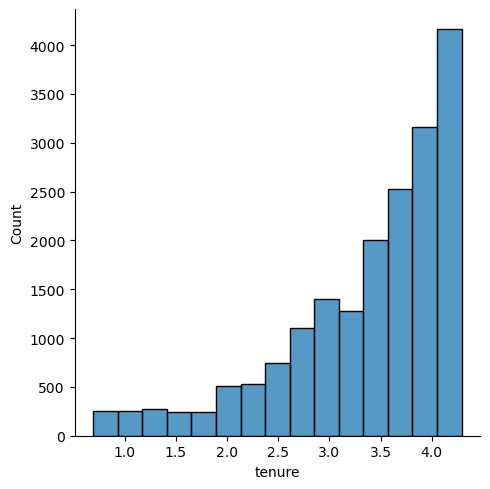

In [95]:
tenure_Driven_log = np.log(df['tenure'] + 1)
print(tenure_Driven_log.skew())
sns.displot(x=tenure_Driven_log,bins=15)

### IMPORTANT STEP
df['tenure'] = support_Driven_log
df['tenure'].skew()

-0.5961404777737572


-0.39854895012377284

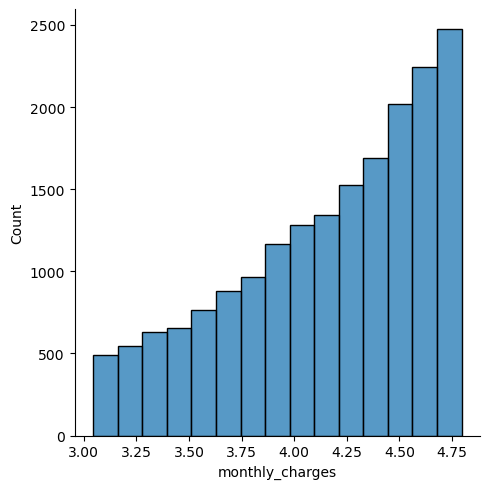

In [99]:
monthlycharges_Driven_log = np.log(df['monthly_charges'] + 1)
print(monthlycharges_Driven_log.skew())
sns.displot(x=monthlycharges_Driven_log,bins=15)

### IMPORTANT STEP
df['monthly_charges'] = support_Driven_log
df['monthly_charges'].skew()

In [103]:
cate_df = df.select_dtypes(include="category")
cate_df

,contract,payment_method,internet_service,tech_support,online_security,churn
0,Month-to-month,Credit,DSL,No,Yes,No
1,Month-to-month,Debit,DSL,No,No,No
2,Month-to-month,Debit,DSL,No,No,No
3,One year,Cash,Fiber,Yes,Yes,No
4,Two year,Cash,Fiber,No,No,No
...,...,...,...,...,...,...
18670,Two year,Cash,DSL,No,Yes,Yes
18671,Month-to-month,UPI,Fiber,Yes,No,No
18672,Month-to-month,Credit,Fiber,No,No,No
18673,Month-to-month,Debit,DSL,Yes,No,No


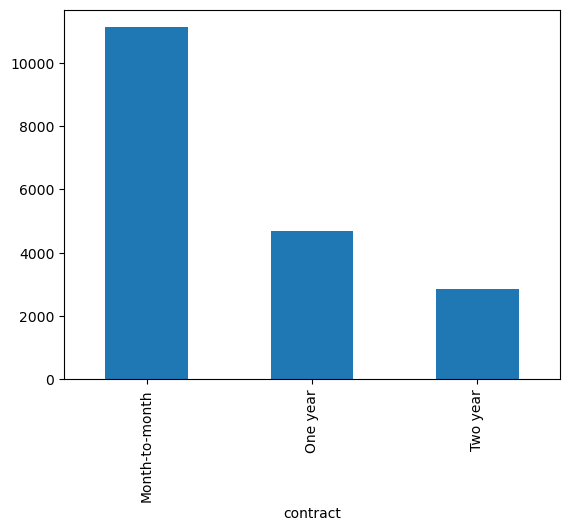

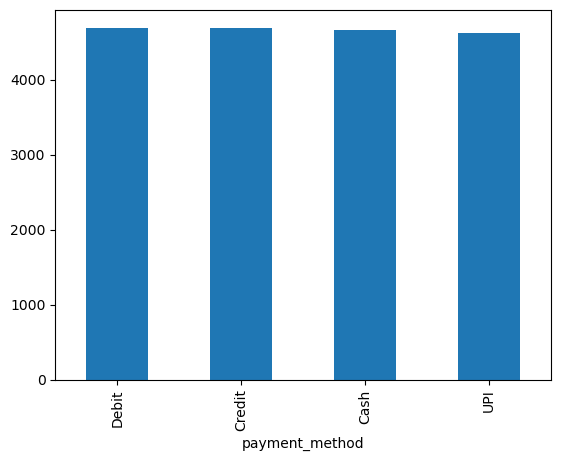

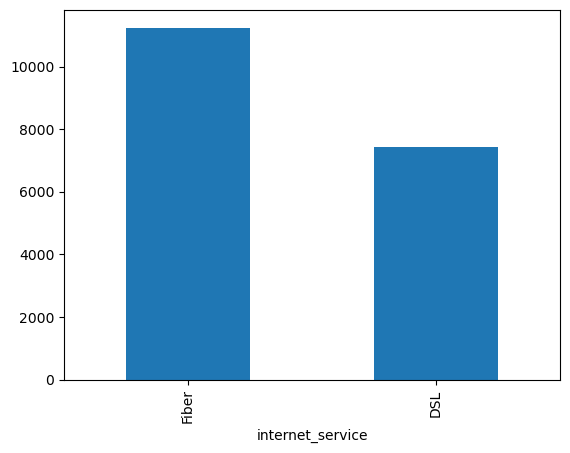

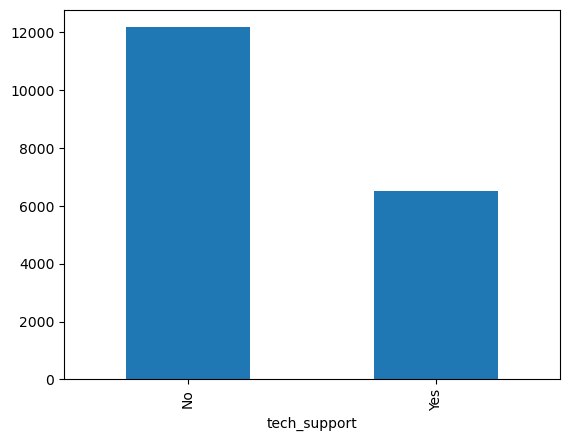

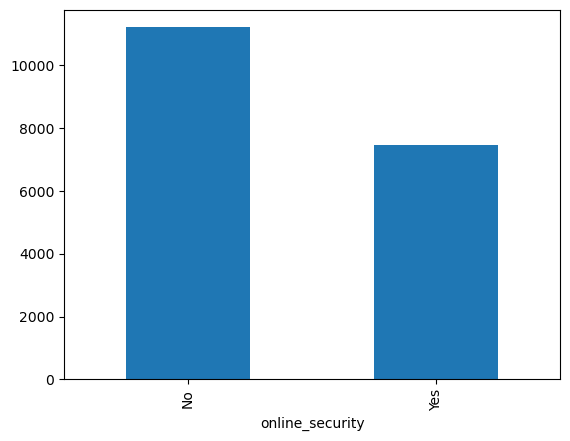

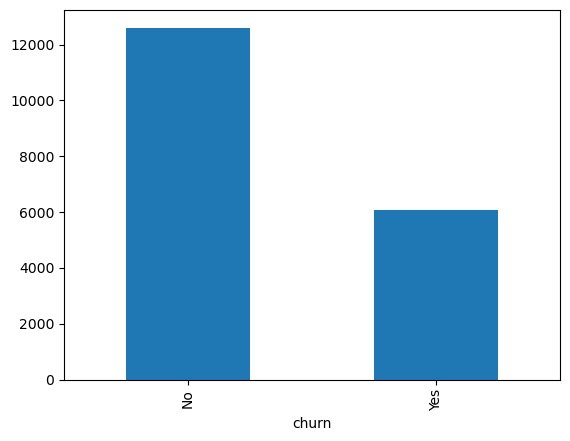

In [105]:
df['contract'].value_counts().plot(kind='bar')
plt.show()
df['payment_method'].value_counts().plot(kind='bar')
plt.show()
df['internet_service'].value_counts().plot(kind='bar')
plt.show()
df['tech_support'].value_counts().plot(kind='bar')
plt.show()
df['online_security'].value_counts().plot(kind='bar')
plt.show()
df['churn'].value_counts().plot(kind='bar')
plt.show()

In [107]:
cate_df

,contract,payment_method,internet_service,tech_support,online_security,churn
0,Month-to-month,Credit,DSL,No,Yes,No
1,Month-to-month,Debit,DSL,No,No,No
2,Month-to-month,Debit,DSL,No,No,No
3,One year,Cash,Fiber,Yes,Yes,No
4,Two year,Cash,Fiber,No,No,No
...,...,...,...,...,...,...
18670,Two year,Cash,DSL,No,Yes,Yes
18671,Month-to-month,UPI,Fiber,Yes,No,No
18672,Month-to-month,Credit,Fiber,No,No,No
18673,Month-to-month,Debit,DSL,Yes,No,No


In [111]:
### Apply label encoding for transmission (Manual = 0, Automatic = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['contract'] = le.fit_transform(df['contract'])
# Display the first few rows of the encoded 'Transmission' column
df[['contract']].head()
print(le.classes_)

['Month-to-month' 'One year' 'Two year']


In [113]:
df['payment_method'] = le.fit_transform(df['payment_method'])
# Display the first few rows 
df[['payment_method']].head()
print(le.classes_)

['Cash' 'Credit' 'Debit' 'UPI']


In [115]:
df['internet_service'] = le.fit_transform(df['internet_service'])
# Display the first few rows 
df[['internet_service']].head()
print(le.classes_)

['DSL' 'Fiber']


In [117]:
df['tech_support'] = le.fit_transform(df['tech_support'])
# Display the first few rows 
df[['tech_support']].head()
print(le.classes_)

['No' 'Yes']


In [131]:
df['online_security'] = le.fit_transform(df['online_security'])
# Display the first few rows 
df[['online_security']].head()
print(le.classes_)

['No' 'Yes']


In [123]:
df['churn'] = le.fit_transform(df['churn'])
# Display the first few rows 
df[['churn']].head()
print(le.classes_)

['No' 'Yes']


In [127]:
df.dtypes

customer_id             int64
tenure                float64
monthly_charges       float64
total_charges         float64
contract                int32
payment_method          int32
internet_service        int32
tech_support            int32
online_security      category
support_calls         float64
churn                   int32
online_security\t       int32
dtype: object

In [133]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,online_security\t
0,1,0.693147,0.693147,2818.40,0,1,0,0,1,0.693147,0,1
1,2,1.098612,1.098612,529.20,0,2,0,0,0,1.098612,0,0
2,3,0.000000,0.000000,5633.28,0,2,0,0,0,0.000000,0,0
3,4,0.000000,0.000000,4894.64,1,0,1,1,1,0.000000,0,1
4,6,0.693147,0.693147,951.84,2,0,1,0,0,0.693147,0,0


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[:])

In [137]:
scaled

array([[-1.72692305, -0.08412528, -0.08412528, ..., -0.08412528,
        -0.69377223,  1.22515486],
       [-1.72675   ,  0.77360096,  0.77360096, ...,  0.77360096,
        -0.69377223, -0.81622335],
       [-1.72657695, -1.55041797, -1.55041797, ..., -1.55041797,
        -0.69377223, -0.81622335],
       ...,
       [ 1.73352122,  0.77360096,  0.77360096, ...,  0.77360096,
        -0.69377223, -0.81622335],
       [ 1.73369427,  0.77360096,  0.77360096, ...,  0.77360096,
        -0.69377223, -0.81622335],
       [ 1.73386732, -0.08412528, -0.08412528, ..., -0.08412528,
         1.44139526, -0.81622335]])

In [139]:
scaled.shape

(18675, 12)

In [141]:
df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn,online_security\t
0,1,0.693147,0.693147,2818.40,0,1,0,0,1,0.693147,0,1
1,2,1.098612,1.098612,529.20,0,2,0,0,0,1.098612,0,0
2,3,0.000000,0.000000,5633.28,0,2,0,0,0,0.000000,0,0
3,4,0.000000,0.000000,4894.64,1,0,1,1,1,0.000000,0,1
4,6,0.693147,0.693147,951.84,2,0,1,0,0,0.693147,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18670,19996,0.000000,0.000000,2502.36,2,0,0,0,1,0.000000,1,1
18671,19997,0.693147,0.693147,598.80,0,3,1,1,0,0.693147,0,0
18672,19998,1.098612,1.098612,257.76,0,1,1,0,0,1.098612,0,0
18673,19999,1.098612,1.098612,719.95,0,2,0,1,0,1.098612,0,0


In [145]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)
print(scaled_df)

       customer_id    tenure  monthly_charges  total_charges  contract  \
0        -1.726923 -0.084125        -0.084125       0.145495 -0.749093   
1        -1.726750  0.773601         0.773601      -1.069583 -0.749093   
2        -1.726577 -1.550418        -1.550418       1.639598 -0.749093   
3        -1.726404 -1.550418        -1.550418       1.247537  0.594741   
4        -1.726058 -0.084125        -0.084125      -0.845251  1.938576   
...            ...       ...              ...            ...       ...   
18670     1.733175 -1.550418        -1.550418      -0.022255  1.938576   
18671     1.733348 -0.084125        -0.084125      -1.032640 -0.749093   
18672     1.733521  0.773601         0.773601      -1.213660 -0.749093   
18673     1.733694  0.773601         0.773601      -0.968335 -0.749093   
18674     1.733867 -0.084125        -0.084125      -0.612660  1.938576   

       payment_method  internet_service  tech_support  online_security  \
0           -0.445100         -1.2307

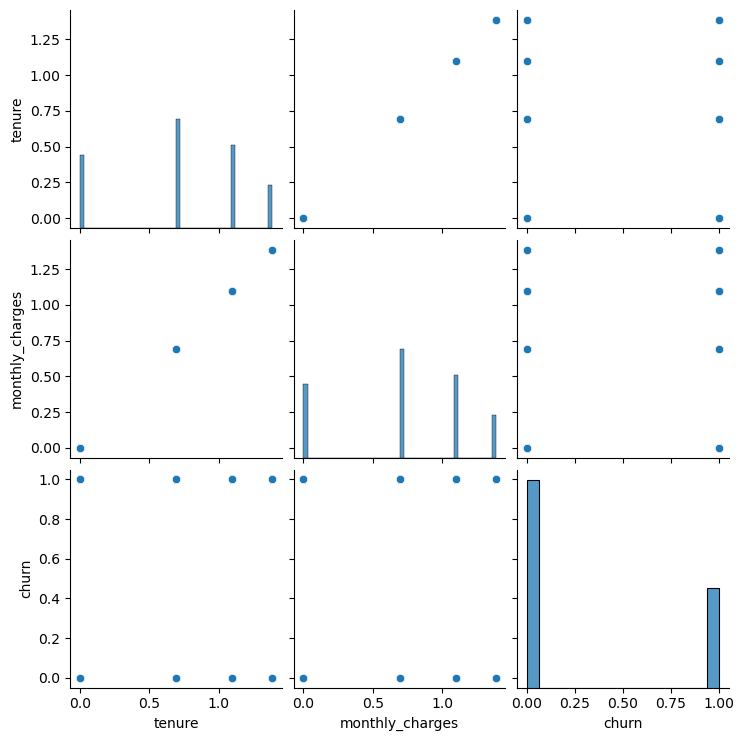

In [171]:
sns.pairplot(df, vars=["tenure","monthly_charges","churn"])

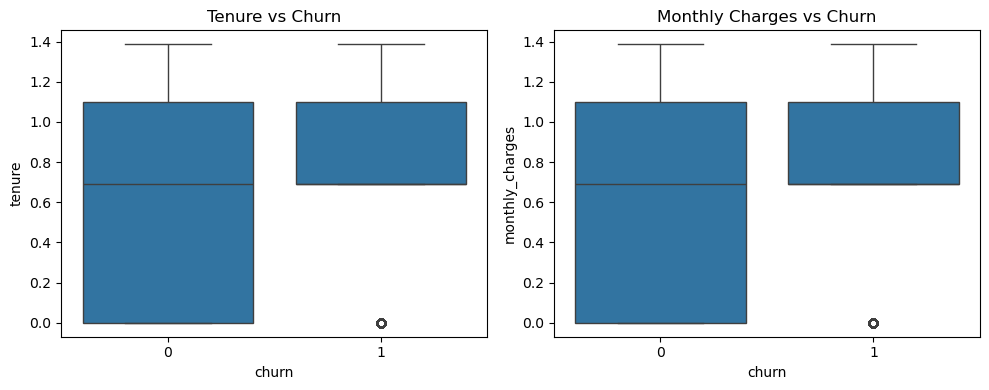

In [173]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x="churn", y="tenure", data=df)
plt.title("Tenure vs Churn")

plt.subplot(1,2,2)
sns.boxplot(x="churn", y="monthly_charges", data=df)
plt.title("Monthly Charges vs Churn")

plt.tight_layout()
plt.show()

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:

X = df.drop('churn',axis=1)       # Features
y = df['churn'] 

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [189]:
y_pred = model.predict(X_test)

In [191]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7127175368139224


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      2472
           1       0.66      0.31      0.42      1263

    accuracy                           0.71      3735
   macro avg       0.69      0.61      0.62      3735
weighted avg       0.70      0.71      0.68      3735



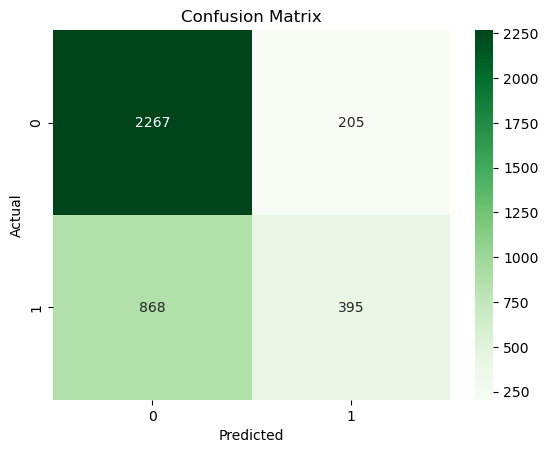

In [209]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()